#Portfolio Assets Allocation Optimization

This script offers investors and financial analysts a comprehensive tool for analyzing and optimizing investment portfolios. By leveraging market data and financial models, it provides valuable insights into portfolio performance and assists in making informed investment decisions.

1. Portfolio Analysis: Retrieve market data and calculate key metrics like market capitalization, returns, risk premium, and volatility to understand portfolio status.
2. Model Comparison: Compare portfolio returns generated by different financial models to evaluate investment strategies.
3. Portfolio Optimization: Determine optimal portfolio weights that maximize the Sharpe Ratio, balancing risk and return.
4. Visual Representation: Visualize optimized portfolio weights using pie charts for easier understanding of portfolio composition.

# Function/Background

In [1]:
#!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf

Fetch_data_from_yahoo function is defined to download historical stock data from Yahoo Finance.
The function takes three parameters:
1. columns_of_firms: A list of symbols or tickers of the firms you want to fetch data for.
2. end_date: The end date of the data you want to fetch.
3. months_to_include: The number of months of data you want to include.
Stock data is downloaded using yf.download() function.
Only 'Adj Close' columns are selected and column names are cleaned.

Percentage change is calculated, NaN values are dropped, and the date column is converted to datetime.
The function returns the processed stock data.

In [3]:
def fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include):
  Stock = yf.download(columns_of_firms, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Adj Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Clean column names
  Stock_adj_close.columns = [col[1] for col in Stock_adj_close.columns]
  Stock = Stock_adj_close.reset_index()
  Stock = Stock.fillna("")
  Stock.iloc[:, 1:] = Stock.iloc[:, 1:].pct_change()
  Stock = Stock.dropna()
  Stock["Date"] = pd.to_datetime(Stock["Date"])
  return Stock


# Basic Data Input

## Retrieves the lists of stocks from each index

This code retrieves the list of S&P 500/S&P 100/Dow Jones/NASDAQ companies from Wikipedia and stores it in a DataFrame.

Sets the URL of the Wikipedia page containing the list. Uses the pd.read_html() function to scrape tables from the Wikipedia page. The match parameter is set to 'Symbol' to match the column name 'Symbol', which is present in the table we want. [0] is used to select the first table found on the page, assuming it contains the components. The data is then stored in the DataFrame. Displays the first few rows of the DataFrame to verify that the data has been successfully retrieved.

In [4]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
dow_jones_components = pd.read_html(url, match='Symbol')[0]
dow_jones_components.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%


In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp_500_components = pd.read_html(url, match='Symbol')[0]
sp_500_components.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [6]:
# Fetching the Dow Jones Industrial Average components from Wikipedia
url = 'https://en.wikipedia.org/wiki/S%26P_100'
sp_100_components = pd.read_html(url, match='Symbol')[0]
sp_100_components.head()

,Symbol,Name,Sector
0,AAPL,Apple,Information Technology
1,ABBV,AbbVie,Health Care
2,ABT,Abbott Laboratories,Health Care
3,ACN,Accenture,Information Technology
4,ADBE,Adobe,Information Technology


In [7]:
# Fetching the NASDAQ-100 components from Wikipedia
url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
nasdaq_100_components = pd.read_html(url, match='Ticker')[0]
nasdaq_100_components.head()

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services


In [68]:
#Randomly selects a set symbols from the index components DataFrame and prints them.
import random
random_selection = random.sample(sp_100_components['Symbol'].tolist(), 12)
print(random_selection)

['CVX', 'CSCO', 'COF', 'LMT', 'LIN', 'UNP', 'PFE', 'DIS', 'TXN', 'UPS', 'INTC', 'TMUS']


## Define Parameters: Stocks, Factors, and Date with a period of time

In [69]:
columns_of_firms = ['CVX', 'CSCO', 'COF', 'LMT', 'LIN', 'UNP', 'PFE', 'DIS', 'TXN', 'UPS', 'INTC', 'TMUS']
columns_of_factors = ["SIZE", "VLUE", "MTUM",	"QUAL",	"USMV",	"DGRO"]

In [70]:
Enddate = "2024-05-10"
Enddate = pd.to_datetime(Enddate)
Months_to_include = 60

# Data Collection and Organization

In [71]:
#Fetches historical stock and factor data using the fetch_data_from_yahoo function defined earlier.
Stock = fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include)
Stock.index = Stock['Date'].values
Stock = Stock.drop(columns=['Date'])
Stock.head()

[*********************100%%**********************]  12 of 12 completed


,COF,CSCO,CVX,DIS,INTC,LIN,LMT,PFE,TMUS,TXN,UNP,UPS
2019-06-01,0.056714,0.051893,0.093017,0.057558,0.086966,0.112157,0.073847,0.043353,0.009532,0.100182,0.013971,0.111386
2019-07-01,0.018514,0.012242,-0.010688,0.024133,0.055985,-0.047410,-0.003768,-0.103416,0.075398,0.089317,0.064100,0.156870
2019-08-01,-0.062757,-0.155054,-0.043782,-0.040207,-0.062117,-0.012390,0.060579,-0.084706,-0.021071,-0.010079,-0.099972,-0.006780
2019-09-01,0.050335,0.055544,0.007475,-0.050561,0.086901,0.025462,0.015490,0.010689,0.009225,0.044364,0.000123,0.009776
2019-10-01,0.024951,-0.038454,-0.020742,-0.003069,0.097031,0.023900,-0.034302,0.067910,0.049384,-0.087047,0.021484,-0.038808


In [72]:
Factor = fetch_data_from_yahoo(columns_of_factors, Enddate, Months_to_include)
Factor.index = Factor['Date'].values
Factor = Factor.drop(columns=['Date'])
Factor.head()

[*********************100%%**********************]  6 of 6 completed


,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
2019-06-01,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463
2019-07-01,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012
2019-08-01,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218
2019-09-01,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645
2019-10-01,0.019673,0.006457,0.022078,0.013109,-0.002340,0.028401


In [73]:
#The fetched stock and factor data are merged together based on the index.
Stock = Stock.merge(Factor, left_index=True, right_index=True)
Stock.head()

,COF,CSCO,CVX,DIS,INTC,LIN,LMT,PFE,TMUS,TXN,UNP,UPS,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
2019-06-01,0.056714,0.051893,0.093017,0.057558,0.086966,0.112157,0.073847,0.043353,0.009532,0.100182,0.013971,0.111386,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463
2019-07-01,0.018514,0.012242,-0.010688,0.024133,0.055985,-0.047410,-0.003768,-0.103416,0.075398,0.089317,0.064100,0.156870,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012
2019-08-01,-0.062757,-0.155054,-0.043782,-0.040207,-0.062117,-0.012390,0.060579,-0.084706,-0.021071,-0.010079,-0.099972,-0.006780,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218
2019-09-01,0.050335,0.055544,0.007475,-0.050561,0.086901,0.025462,0.015490,0.010689,0.009225,0.044364,0.000123,0.009776,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645
2019-10-01,0.024951,-0.038454,-0.020742,-0.003069,0.097031,0.023900,-0.034302,0.067910,0.049384,-0.087047,0.021484,-0.038808,0.019673,0.006457,0.022078,0.013109,-0.002340,0.028401


In [74]:
#This section fetches historical data for NASDAQ, Dow Jones, and S&P 500 indexes.
#Renames the columns for clarity and assigns the chosen one as index to the Stock DataFrame.
import yfinance as yf

# Define the ticker symbols for Treasury bonds
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
# Fetch data
Index = yf.download(Index, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Index.columns if 'Adj Close' in col]
Index_adj_close = Index[adj_close_columns]
# Clean column names
Index_adj_close.columns = [col[1] for col in Index_adj_close.columns]
Index = Index_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  3 of 3 completed

Column names cleaned and DataFrame reset.


In [75]:
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
Index = fetch_data_from_yahoo(Index, Enddate, Months_to_include)
Index = Index.rename(columns = {"^IXIC": "NASDAQ", "^DJI":"Dow Jones", "^GSPC":"S&P 500"})
Index.head()

[*********************100%%**********************]  3 of 3 completed


,Date,Dow Jones,S&P 500,NASDAQ
1,2019-06-01,0.071929,0.068930,0.074209
2,2019-07-01,0.009936,0.013128,0.021131
3,2019-08-01,-0.017160,-0.018092,-0.025997
4,2019-09-01,0.019450,0.017181,0.004579
5,2019-10-01,0.004807,0.020432,0.036631


In [76]:
Stock['Index'] = Index['S&P 500'].values

In [77]:
#Fetches historical data for risk-free rates of various Treasury bonds.
#Adjusts the data to get monthly rates and assigns the chose one as risk-free rate to the Stock DataFrame.
import yfinance as yf

# Define the ticker symbols for Treasury bonds
risk_free = ["^IRX", "^FVX", "^TNX", "^TYX"]  # 6-month T-bill, 5-year, 10-year, 30-year
# Fetch data
Risk_Free_Rate = yf.download(risk_free, start=Enddate - pd.DateOffset(months=Months_to_include), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Risk_Free_Rate.columns if 'Adj Close' in col]
Risk_Free_Rate_adj_close = Risk_Free_Rate[adj_close_columns]
# Clean column names
Risk_Free_Rate_adj_close.columns = [col[1] for col in Risk_Free_Rate_adj_close.columns]
Risk_Free_Rate = Risk_Free_Rate_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  4 of 4 completed

Column names cleaned and DataFrame reset.


In [78]:
Risk_Free_Rate = Risk_Free_Rate.rename(columns = {"^IRX": "TB13W", "^FVX": "TB5", "^TNX": "TB10", "^TYX": "TB30"})
Risk_Free_Rate["Date"] = pd.to_datetime(Risk_Free_Rate["Date"])
Risk_Free_Rate.iloc[:, 1:] = Risk_Free_Rate.iloc[:, 1:]/100
Risk_Free_Rate = Risk_Free_Rate[['Date', 'TB13W', 'TB5', 'TB10', 'TB30']]
Risk_Free_Rate.tail()

,Date,TB13W,TB5,TB10,TB30
55,2024-01-01,0.05188,0.03882,0.03967,0.04215
56,2024-02-01,0.05223,0.04262,0.04252,0.04375
57,2024-03-01,0.05203,0.04220,0.04206,0.04349
58,2024-04-01,0.05245,0.04723,0.04686,0.04790
59,2024-05-01,0.05238,0.04567,0.04571,0.04718


In [79]:
Stock['Risk_Free_Rate'] = Risk_Free_Rate['TB13W'].values/12
Stock.head()

,COF,CSCO,CVX,DIS,INTC,LIN,LMT,PFE,TMUS,TXN,UNP,UPS,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2019-06-01,0.056714,0.051893,0.093017,0.057558,0.086966,0.112157,0.073847,0.043353,0.009532,0.100182,0.013971,0.111386,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.068930,0.001696
2019-07-01,0.018514,0.012242,-0.010688,0.024133,0.055985,-0.047410,-0.003768,-0.103416,0.075398,0.089317,0.064100,0.156870,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.013128,0.001692
2019-08-01,-0.062757,-0.155054,-0.043782,-0.040207,-0.062117,-0.012390,0.060579,-0.084706,-0.021071,-0.010079,-0.099972,-0.006780,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.018092,0.001611
2019-09-01,0.050335,0.055544,0.007475,-0.050561,0.086901,0.025462,0.015490,0.010689,0.009225,0.044364,0.000123,0.009776,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.017181,0.001475
2019-10-01,0.024951,-0.038454,-0.020742,-0.003069,0.097031,0.023900,-0.034302,0.067910,0.049384,-0.087047,0.021484,-0.038808,0.019673,0.006457,0.022078,0.013109,-0.002340,0.028401,0.020432,0.001248


In [80]:
Stock.tail()

,COF,CSCO,CVX,DIS,INTC,LIN,LMT,PFE,TMUS,TXN,UNP,UPS,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2024-01-01,0.032032,-0.006730,-0.011598,0.063794,-0.142687,-0.014317,-0.052577,-0.059396,0.005613,-0.060659,-0.006881,-0.097500,0.012635,0.055835,0.022835,-0.009024,0.021658,-0.008501,0.015896,0.004323
2024-02-01,0.016923,-0.036070,0.031066,0.161687,-0.000696,0.108663,-0.002725,-0.019202,0.012839,0.045029,0.040012,0.044820,0.030826,0.099970,0.064983,0.047980,0.020948,0.025224,0.051721,0.004353
2024-03-01,0.081971,0.031838,0.037695,0.096612,0.026016,0.034535,0.062185,0.044804,-0.000490,0.041116,-0.030589,0.002496,0.033464,0.028209,0.025393,0.038992,0.026908,0.053292,0.031019,0.004336
2024-04-01,-0.036671,-0.058706,0.022379,-0.092024,-0.310165,-0.050310,0.022116,-0.076757,0.005820,0.012686,-0.035661,-0.007737,-0.036342,-0.054657,-0.044965,-0.053061,-0.037449,-0.067953,-0.041615,0.004371
2024-05-01,-0.016593,0.028949,-0.001116,-0.069577,0.051198,-0.025558,-0.000215,0.128806,-0.003594,0.105147,0.036853,0.014782,0.043789,0.059059,0.054855,0.042007,0.042635,0.035760,0.051911,0.004365


Excess returns are calculated by subtracting the risk-free rate from each stock's return.

In [81]:
Excess_Returns = Stock.apply(lambda x: x - Stock["Risk_Free_Rate"] if x.name not in ["Risk_Free_Rate"] else x)
Excess_Returns.head()

,COF,CSCO,CVX,DIS,INTC,LIN,LMT,PFE,TMUS,TXN,UNP,UPS,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index,Risk_Free_Rate
2019-06-01,0.055018,0.050197,0.091321,0.055863,0.085271,0.110461,0.072151,0.041657,0.007836,0.098486,0.012275,0.109690,0.061483,0.055439,0.063643,0.068515,0.042628,0.085767,0.067234,0.001696
2019-07-01,0.016823,0.010550,-0.012380,0.022442,0.054293,-0.049102,-0.005460,-0.105108,0.073706,0.087625,0.062409,0.155179,0.012444,0.016268,0.012083,0.010396,0.014994,0.014320,0.011436,0.001692
2019-08-01,-0.064368,-0.156665,-0.045393,-0.041818,-0.063728,-0.014001,0.058968,-0.086317,-0.022682,-0.011690,-0.101583,-0.008391,-0.015292,0.001040,-0.019404,-0.036139,0.014323,-0.046828,-0.019702,0.001611
2019-09-01,0.048860,0.054069,0.006000,-0.052036,0.085426,0.023987,0.014015,0.009214,0.007750,0.042889,-0.001352,0.008301,0.022864,-0.016345,0.013018,0.019443,0.003857,0.040170,0.015706,0.001475
2019-10-01,0.023702,-0.039702,-0.021990,-0.004318,0.095783,0.022652,-0.035551,0.066662,0.048136,-0.088296,0.020236,-0.040057,0.018425,0.005209,0.020830,0.011860,-0.003588,0.027152,0.019183,0.001248


# Regression

Imports necessary libraries to run regression:
1. pandas for data manipulation.
2. numpy for numerical operations.
3. statsmodels.api for statistical modeling.
3. statsmodels.formula.api for using formulas in regression models.

Performs linear regression for each column in Excess_Returns DataFrame.
It creates two DataFrames: Market_Beta for stock beta and Factor_Market_Beta for factor beta.
For each column, it prepares the design matrix X, performs OLS regression, and stores predicted values, residuals, and intercepts in the appropriate DataFrames.

Note: List of columns to exclude is to not to run the regression with risk-free rate.


In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf #this will have linear regression and logistic regression modules

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"] #This line defines a list of columns to exclude when performing regressions.

# Create DataFrames to store predicted values, residuals, and intercepts
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with Index
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [83]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, intercepts, and slopes
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()
Slopes_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with Index
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, intercept, and slope
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name
        slope = model.params[1]  # Access the slope for VTI

        # Store results in the appropriate DataFrames
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [84]:
Market_Beta.head()

,COF_Predicted,COF_Residuals,COF_Intercept,CSCO_Predicted,CSCO_Residuals,CSCO_Intercept,CVX_Predicted,CVX_Residuals,CVX_Intercept,DIS_Predicted,...,TMUS_Intercept,TXN_Predicted,TXN_Residuals,TXN_Intercept,UNP_Predicted,UNP_Residuals,UNP_Intercept,UPS_Predicted,UPS_Residuals,UPS_Intercept
2019-06-01,0.095429,-0.040411,-0.002225,0.048206,0.001991,-0.009223,0.071266,0.020056,-0.003382,0.078291,...,0.008352,0.067475,0.031012,0.00068,0.067852,-0.055577,-0.004003,0.068035,0.041655,-0.000887
2019-07-01,0.014386,0.002437,-0.002225,0.000546,0.010004,-0.009223,0.009315,-0.021695,-0.003382,0.000350,...,0.008352,0.012042,0.075584,0.00068,0.008219,0.054189,-0.004003,0.010836,0.144342,-0.000887
2019-08-01,-0.030842,-0.033526,-0.002225,-0.026052,-0.130613,-0.009223,-0.025257,-0.020136,-0.003382,-0.043147,...,0.008352,-0.018894,0.007204,0.00068,-0.025060,-0.076523,-0.004003,-0.021084,0.012694,-0.000887
2019-09-01,0.020587,0.028272,-0.002225,0.004193,0.049876,-0.009223,0.014056,-0.008055,-0.003382,0.006314,...,0.008352,0.016283,0.026605,0.00068,0.012782,-0.014134,-0.004003,0.015213,-0.006912,-0.000887
2019-10-01,0.025638,-0.001936,-0.002225,0.007163,-0.046865,-0.009223,0.017916,-0.039907,-0.003382,0.011171,...,0.008352,0.019738,-0.108034,0.00068,0.016499,0.003737,-0.004003,0.018778,-0.058834,-0.000887


In [85]:
Factor_Market_Beta.head()

,DGRO_Predicted,DGRO_Residuals,DGRO_Intercept,MTUM_Predicted,MTUM_Residuals,MTUM_Intercept,QUAL_Predicted,QUAL_Residuals,QUAL_Intercept,SIZE_Predicted,SIZE_Residuals,SIZE_Intercept,USMV_Predicted,USMV_Residuals,USMV_Intercept,VLUE_Predicted,VLUE_Residuals,VLUE_Intercept
2019-06-01,0.058795,0.002687,-0.001988,0.062565,-0.007126,-0.001721,0.069404,-0.005760,-0.000206,0.069966,-0.001451,-0.003107,0.048548,-0.005919,-0.003118,0.064912,0.020855,-0.005297
2019-07-01,0.008352,0.004093,-0.001988,0.009214,0.007054,-0.001721,0.011634,0.000449,-0.000206,0.009323,0.001074,-0.003107,0.005670,0.009324,-0.003118,0.006646,0.007675,-0.005297
2019-08-01,-0.019800,0.004508,-0.001988,-0.020559,0.021599,-0.001721,-0.020605,0.001201,-0.000206,-0.024520,-0.011618,-0.003107,-0.018259,0.032582,-0.003118,-0.025871,-0.020957,-0.005297
2019-09-01,0.012212,0.010653,-0.001988,0.013297,-0.029642,-0.001721,0.016055,-0.003037,-0.000206,0.013963,0.005480,-0.003107,0.008951,-0.005093,-0.003118,0.011104,0.029066,-0.005297
2019-10-01,0.015355,0.003069,-0.001988,0.016621,-0.011413,-0.001721,0.019655,0.001175,-0.000206,0.017742,-0.005882,-0.003107,0.011623,-0.015211,-0.003118,0.014735,0.012417,-0.005297


In [86]:
#This section organizes the residuals from linear regression for each column.
#Creates two DataFrames: Organized_Market_Beta and Organized_Factor_Market_Beta, containing organized residual data.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime, timedelta

# Assuming 'your_table' is your DataFrame

# Create DataFrames to store predicted values, residuals, and intercepts
Organized_Market_Beta = pd.DataFrame()
Organized_Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            # Add time information
            Organized_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

        elif column in columns_of_factors:
            # Add time information
            Organized_Factor_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

In [87]:
Organized_Market_Beta.head()

,COF_Organized_Data,CSCO_Organized_Data,CVX_Organized_Data,DIS_Organized_Data,INTC_Organized_Data,LIN_Organized_Data,LMT_Organized_Data,PFE_Organized_Data,TMUS_Organized_Data,TXN_Organized_Data,UNP_Organized_Data,UPS_Organized_Data
2019-06-01,-0.042636,-0.007231,0.016673,-0.038054,0.013719,0.046091,0.040588,-0.004945,-0.024703,0.031692,-0.059580,0.040768
2019-07-01,0.000212,0.000782,-0.025077,0.006467,0.042122,-0.060051,-0.010829,-0.113035,0.068171,0.076263,0.050186,0.143455
2019-08-01,-0.035751,-0.139836,-0.023518,-0.014296,-0.042760,0.004862,0.068218,-0.072661,-0.013147,0.007884,-0.080526,0.011806
2019-09-01,0.026047,0.040653,-0.011438,-0.073975,0.068712,0.008950,0.006642,-0.001672,0.000149,0.027285,-0.018137,-0.007800
2019-10-01,-0.004161,-0.056088,-0.043289,-0.031114,0.075367,0.004286,-0.044556,0.053365,0.038852,-0.107354,-0.000266,-0.059722


In [88]:
Organized_Factor_Market_Beta.head()

,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data
2019-06-01,0.000700,-0.008847,-0.005967,-0.004558,-0.009038,0.015558
2019-07-01,0.002105,0.005333,0.000243,-0.002033,0.006206,0.002378
2019-08-01,0.002520,0.019878,0.000994,-0.014725,0.029463,-0.026254
2019-09-01,0.008665,-0.031362,-0.003243,0.002373,-0.008212,0.023769
2019-10-01,0.001082,-0.013134,0.000968,-0.008989,-0.018330,0.007120


In [89]:
#This section combines the factor beta and organized firm residues into one DataFrame called Factor_Beta

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Factor_Beta = pd.DataFrame()
columns_to_exclude = ["Risk_Free_Rate"]

# Prepare the design matrix (X) factors
X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
  if column not in columns_to_exclude:

    # Get the target variable (y)
     y = Organized_Market_Beta[column]

    # Perform linear regression using statsmodels
     model = sm.OLS(y, X).fit()

    # Get predicted values, residuals, and intercept
     predicted_values = model.predict(X)
     residuals = model.resid
     intercept = model.params[0]  # Access the intercept without specifying the variable name

    # Store results in the appropriate DataFrame
     Factor_Beta[f"{column}_Predicted"] = predicted_values
     Factor_Beta[f"{column}_Residuals"] = residuals
     Factor_Beta[f"{column}_Intercept"] = intercept

In [90]:
Factor_Beta.head()

,COF_Organized_Data_Predicted,COF_Organized_Data_Residuals,COF_Organized_Data_Intercept,CSCO_Organized_Data_Predicted,CSCO_Organized_Data_Residuals,CSCO_Organized_Data_Intercept,CVX_Organized_Data_Predicted,CVX_Organized_Data_Residuals,CVX_Organized_Data_Intercept,DIS_Organized_Data_Predicted,...,TMUS_Organized_Data_Intercept,TXN_Organized_Data_Predicted,TXN_Organized_Data_Residuals,TXN_Organized_Data_Intercept,UNP_Organized_Data_Predicted,UNP_Organized_Data_Residuals,UNP_Organized_Data_Intercept,UPS_Organized_Data_Predicted,UPS_Organized_Data_Residuals,UPS_Organized_Data_Intercept
2019-06-01,0.020606,-0.063243,0.005612,-0.002807,-0.004425,-0.005,0.028144,-0.011471,0.00137,-0.013059,...,0.014752,0.012810,0.018882,-0.000137,-0.019822,-0.039759,-0.005598,-0.013502,0.054270,-0.006395
2019-07-01,-0.003560,0.003772,0.005612,0.001993,-0.001211,-0.005,0.003481,-0.028558,0.00137,-0.013858,...,0.014752,-0.005989,0.082252,-0.000137,-0.009043,0.059230,-0.005598,-0.013556,0.157011,-0.006395
2019-08-01,-0.074284,0.038533,0.005612,0.008096,-0.147932,-0.005,-0.029728,0.006210,0.00137,-0.046035,...,0.014752,-0.034083,0.041967,-0.000137,-0.000549,-0.079978,-0.005598,-0.000594,0.012401,-0.006395
2019-09-01,0.042620,-0.016573,0.005612,0.010518,0.030136,-0.005,0.042649,-0.054086,0.00137,-0.019431,...,0.014752,0.023001,0.004284,-0.000137,-0.007611,-0.010526,-0.005598,-0.006046,-0.001754,-0.006395
2019-10-01,0.003415,-0.007575,0.005612,-0.008075,-0.048013,-0.005,0.021928,-0.065217,0.00137,-0.014931,...,0.014752,0.012621,-0.119975,-0.000137,-0.004642,0.004376,-0.005598,-0.002601,-0.057121,-0.006395


In [91]:
#This section calculates firm residues by adding the intercept from the factor beta model to the corresponding firm's residuals.

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Firm_Residues = pd.DataFrame()

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:

    # Store results in the appropriate DataFrame
    Firm_Residues[f"{column}_Residuals"] = Factor_Beta[f"{column}_Residuals"] + Factor_Beta[f"{column}_Intercept"]

In [92]:
Firm_Residues.head()

,COF_Organized_Data_Residuals,CSCO_Organized_Data_Residuals,CVX_Organized_Data_Residuals,DIS_Organized_Data_Residuals,INTC_Organized_Data_Residuals,LIN_Organized_Data_Residuals,LMT_Organized_Data_Residuals,PFE_Organized_Data_Residuals,TMUS_Organized_Data_Residuals,TXN_Organized_Data_Residuals,UNP_Organized_Data_Residuals,UPS_Organized_Data_Residuals
2019-06-01,-0.057631,-0.009424,-0.010100,-0.036558,-0.033463,0.055164,0.031324,-0.001359,-0.019878,0.018744,-0.045356,0.047874
2019-07-01,0.009384,-0.006211,-0.027187,0.008762,0.025426,-0.063279,-0.023144,-0.120996,0.063292,0.082115,0.053632,0.150616
2019-08-01,0.044145,-0.152932,0.007580,0.020175,-0.022506,-0.013233,0.031768,-0.119359,-0.016039,0.041829,-0.085575,0.006005
2019-09-01,-0.010960,0.025136,-0.052716,-0.066108,0.043361,0.003745,-0.006443,-0.012970,0.009062,0.004147,-0.016124,-0.008150
2019-10-01,-0.001963,-0.053012,-0.063846,-0.027747,0.059761,0.000337,-0.037539,0.049472,0.060601,-0.120112,-0.001221,-0.063516


# Beta

**Factor Beta**
1. Initialize DataFrame and Prepare Design Matrix:
Initialize an empty DataFrame Factor_Beta to store coefficients. Design matrix X by adding a constant term to Organized_Factor_Market_Beta.
2. Perform Linear Regression:
Iterate over each factor column in Organized_Market_Beta.
Check if the column is not in the columns_to_exclude list.
Define the target variable y as the column data and perform linear regression using statsmodels.
3. Retrieve Coefficients:
Retrieve the coefficients (slopes) from the regression model results, excluding the intercept.
4. Store Coefficients in DataFrame:
Store the obtained coefficients for the current factor in the Factor_Beta DataFrame under the corresponding column name.

**Slope Market Beta**
1. Create DataFrame to Store Slopes
Objective: Initialize a DataFrame to store slopes calculated from linear regression for each output in Market_Beta.
2. Prepare Design Matrix and Iterate Over Columns
Objective:
Prepare the design matrix (X) by adding a constant term to the index (Excess_Returns['Index']).
Iterate over each column in Excess_Returns to perform linear regression for each output in Market_Beta.
3. Retrieve Slopes and Store in DataFrame
Objective:
Perform linear regression for each column in Excess_Returns using statsmodels and retrieve the slope for VTI.
Store the obtained slope values in the Slopes_Market_Beta DataFrame.
4. Rename Columns and Select Desired Columns
Objective:
Rename the first column of Slopes_Market_Beta to remove "_Organized_Data".
Select only the desired columns (firms) from Slopes_Market_Beta.
5. Combine Slopes with Factor Coefficients
Objective:
Transpose Slopes_Market_Beta DataFrame to make factors as rows and rename the column as "Index".
Update Slopes_Market_Beta with the coefficients from Factor_Beta.

In [93]:
# Create a DataFrame to store coefficients
Factor_Beta = pd.DataFrame()

X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
    if column not in columns_to_exclude:

        # Get the target variable (y)
        y = Organized_Market_Beta[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get coefficients and intercept
        coefficients = model.params[1:]  # Exclude the intercept

        # Store coefficients in the appropriate DataFrame
        Factor_Beta[column] = coefficients

# Transpose the DataFrame
Factor_Beta = Factor_Beta.T

# Set the first row as the header
Factor_Beta.columns = X.columns[1:]

# Rename the index column
Factor_Beta = Factor_Beta.rename_axis('Factor').reset_index()
Factor_Beta.columns = [col.replace('_Organized_Data', '') for col in Factor_Beta.columns]

In [94]:
Factor_Beta = Factor_Beta.drop(columns=Factor_Beta.columns[0])
Factor_Beta.head()

,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
0,-0.720973,-0.341584,-0.825334,2.260470,-0.496227,0.859392
1,-0.516365,-0.506616,1.093730,-0.640716,1.180587,0.793692
2,2.152237,0.116197,-1.285026,-0.217248,-0.773171,0.684573
3,-0.815715,0.585252,0.777926,1.003616,-0.514720,0.566739
4,-5.517692,-0.103789,1.592932,-2.936487,2.035378,4.154722


In [95]:
# Create a DataFrame to store slopes for each output in Market_Beta
Slopes_Market_Beta = pd.DataFrame(index=[0])
columns_to_exclude = ["Risk_Free_Rate"]

# Prepare the design matrix (X) with Index
X = sm.add_constant(Excess_Returns['Index'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get the slope for VTI
        slope = model.params[1]  # Access the slope for VTI

        # Store the slope value in the appropriate DataFrame
        Slopes_Market_Beta.at[0, f"{column}"] = slope

In [96]:
Slopes_Market_Beta.head()

,COF,CSCO,CVX,DIS,INTC,LIN,LMT,PFE,TMUS,TXN,UNP,UPS,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,Index
0,1.452442,0.854155,1.110268,1.396847,1.064209,0.957407,0.469443,0.693128,0.48396,0.993461,1.068725,1.025107,0.904048,0.956152,1.035334,1.086836,0.768449,1.044248,1.0


In [97]:
# Rename the first column to remove "Organized_Data"
Slopes_Market_Beta.columns = [col.replace("_Organized_Data", "") for col in Slopes_Market_Beta.columns]

# Select the desired columns
Slopes_Market_Beta = Slopes_Market_Beta[columns_of_firms]

In [98]:
Slopes_Market_Beta.head()

,CVX,CSCO,COF,LMT,LIN,UNP,PFE,DIS,TXN,UPS,INTC,TMUS
0,1.110268,0.854155,1.452442,0.469443,0.957407,1.068725,0.693128,1.396847,0.993461,1.025107,1.064209,0.48396


In [99]:
Slopes_Market_Beta = Slopes_Market_Beta.T
Slopes_Market_Beta.columns = ["Index"]
Slopes_Market_Beta.update(Factor_Beta)

In [100]:
# Iterate over columns in Slopes_Market_Beta
for column in Factor_Beta.columns:
    # Check if the column exists in Beta
      Slopes_Market_Beta[column] = Factor_Beta[column].values
Beta = Slopes_Market_Beta

In [101]:
Beta

,Index,DGRO,MTUM,QUAL,SIZE,USMV,VLUE
CVX,1.110268,-0.720973,-0.341584,-0.825334,2.260470,-0.496227,0.859392
CSCO,0.854155,-0.516365,-0.506616,1.093730,-0.640716,1.180587,0.793692
COF,1.452442,2.152237,0.116197,-1.285026,-0.217248,-0.773171,0.684573
LMT,0.469443,-0.815715,0.585252,0.777926,1.003616,-0.514720,0.566739
LIN,0.957407,-5.517692,-0.103789,1.592932,-2.936487,2.035378,4.154722
UNP,1.068725,1.863280,-0.078570,1.041204,-0.267499,-0.019013,-0.401752
PFE,0.693128,1.459028,0.094916,-1.171399,-0.968361,0.976303,0.417985
DIS,1.396847,2.433977,-0.319593,0.091039,-1.175913,0.540916,-0.517007
TXN,0.993461,-0.985498,0.291684,0.074323,0.641331,0.844622,0.607064
UPS,1.025107,-0.623996,-0.527694,-0.225339,0.200113,-0.333195,0.338838


# Covariance Matrix

1. Market Covariance Matrix Calculation
Objective: Calculate the covariance matrix for the market (firms).
Process:
Compute the covariance matrix for the selected firm columns in the Excess_Returns DataFrame.
Multiply the covariance matrix by 12 to annualize it.
2. Index Variance Calculation
Objective: Calculate the variance of the market index.
Process:
Compute the variance of the market index and annualize it.
Store the result in a DataFrame with column name 'Index'.
3. Factor Covariance Matrix Calculation
Objective: Calculate the covariance matrix for the factors.
Process:
Compute the covariance matrix for the factors.
Multiply the factor covariance matrix by 12 to annualize it.
Concatenate the index variance to the factor covariance matrix.
Fill any missing values with zeros.
4. Reordering Rows and Columns
Objective: Ensure consistency by reordering rows and columns.
Process:
Swap the last column with the first column.
Swap the last row with the first row.
Rename the index to ensure the first row corresponds to the market index.
5. Displaying Covariance Matrices
Objective: Display the calculated covariance matrices.
Process:
Display the factor and market covariance matrices.

In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed

market_covariance_matrix = Excess_Returns[columns_of_firms].cov()
market_covariance_matrix = market_covariance_matrix*12

index_variance = pd.DataFrame({'Index': [Excess_Returns['Index'].var() * 12]})

factor_covariance_matrix = Organized_Factor_Market_Beta.cov()
factor_covariance_matrix = factor_covariance_matrix*12
factor_covariance_matrix = pd.concat([factor_covariance_matrix, index_variance])
factor_covariance_matrix = factor_covariance_matrix.fillna(0)
# Swap last column with first column
factor_covariance_matrix = factor_covariance_matrix[[factor_covariance_matrix.columns[-1]] + list(factor_covariance_matrix.columns[:-1])]

# Swap last row with first row
factor_covariance_matrix = factor_covariance_matrix.reindex([factor_covariance_matrix.index[-1]] + list(factor_covariance_matrix.index[:-1]))
factor_covariance_matrix.index = ["Index"] + list(factor_covariance_matrix.index[1:])

In [103]:
factor_covariance_matrix

,Index,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data
Index,0.033187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DGRO_Organized_Data,0.000000,0.002408,-0.000314,-0.000056,0.001319,0.001289,0.003262
MTUM_Organized_Data,0.000000,-0.000314,0.007534,-0.000274,-0.000485,0.000807,-0.002101
QUAL_Organized_Data,0.000000,-0.000056,-0.000274,0.000786,-0.000205,0.000211,-0.000510
SIZE_Organized_Data,0.000000,0.001319,-0.000485,-0.000205,0.003137,-0.000063,0.003794
USMV_Organized_Data,0.000000,0.001289,0.000807,0.000211,-0.000063,0.002836,-0.000040
VLUE_Organized_Data,0.000000,0.003262,-0.002101,-0.000510,0.003794,-0.000040,0.009110


In [104]:
market_covariance_matrix

,CVX,CSCO,COF,LMT,LIN,UNP,PFE,DIS,TXN,UPS,INTC,TMUS
CVX,0.108869,0.035399,0.065439,0.036581,0.035084,0.040595,0.028504,0.055792,0.043500,0.026112,0.039196,0.023395
CSCO,0.035399,0.069059,0.032752,0.020293,0.035040,0.034989,0.033075,0.033780,0.029475,0.031035,0.040348,0.020520
COF,0.065439,0.032752,0.148779,0.032749,0.033542,0.043415,0.013798,0.095070,0.048463,0.030688,0.050968,0.032033
LMT,0.036581,0.020293,0.032749,0.050978,0.019095,0.018222,0.017450,0.025017,0.010573,0.016496,0.019293,0.014297
LIN,0.035084,0.035040,0.033542,0.019095,0.053142,0.036192,0.034032,0.040381,0.028510,0.039284,0.026041,0.018029
UNP,0.040595,0.034989,0.043415,0.018222,0.036192,0.063970,0.023683,0.044405,0.032842,0.048336,0.036607,0.016278
PFE,0.028504,0.033075,0.013798,0.017450,0.034032,0.023683,0.078217,0.006378,0.021210,0.022657,0.020065,0.005808
DIS,0.055792,0.033780,0.095070,0.025017,0.040381,0.044405,0.006378,0.123608,0.035957,0.046866,0.049122,0.033876
TXN,0.043500,0.029475,0.048463,0.010573,0.028510,0.032842,0.021210,0.035957,0.061017,0.036869,0.045263,0.017656
UPS,0.026112,0.031035,0.030688,0.016496,0.039284,0.048336,0.022657,0.046866,0.036869,0.094448,0.022508,0.022382


In [105]:
import pandas as pd
import numpy as np

One_Factor_Model_Resuduals = Organized_Market_Beta.var()
df = pd.DataFrame(One_Factor_Model_Resuduals)

# Extract column and index names
columns_and_index = df.index.tolist()

# Create a square matrix with 0s
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))

# Fill the diagonal with the values from the DataFrame
np.fill_diagonal(result_matrix, df.iloc[:, 0])

# Create a new DataFrame with the matrix and set column and index names
One_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
One_Factor_Model_Resuduals = One_Factor_Model_Resuduals*12

In [106]:
One_Factor_Model_Resuduals.head(12)

,COF_Organized_Data,CSCO_Organized_Data,CVX_Organized_Data,DIS_Organized_Data,INTC_Organized_Data,LIN_Organized_Data,LMT_Organized_Data,PFE_Organized_Data,TMUS_Organized_Data,TXN_Organized_Data,UNP_Organized_Data,UPS_Organized_Data
COF_Organized_Data,0.078768,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CSCO_Organized_Data,0.000000,0.044846,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVX_Organized_Data,0.000000,0.000000,0.06796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DIS_Organized_Data,0.000000,0.000000,0.00000,0.058854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INTC_Organized_Data,0.000000,0.000000,0.00000,0.000000,0.091058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LIN_Organized_Data,0.000000,0.000000,0.00000,0.000000,0.000000,0.022722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LMT_Organized_Data,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.043664,0.000000,0.000000,0.000000,0.000000,0.000000
PFE_Organized_Data,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.062273,0.000000,0.000000,0.000000,0.000000
TMUS_Organized_Data,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038257,0.000000,0.000000,0.000000
TXN_Organized_Data,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028263,0.000000,0.000000


In [107]:
One_Factor = pd.DataFrame(Beta.iloc[:, 0])
One_Factor = One_Factor.T.values * One_Factor.values
One_Factor = pd.DataFrame(One_Factor)
One_Factor = One_Factor * factor_covariance_matrix.iloc[0,0]
One_Factor = One_Factor.values + One_Factor_Model_Resuduals.values
One_Factor = pd.DataFrame(One_Factor, index=columns_of_firms, columns=columns_of_firms)
One_Factor

,CVX,CSCO,COF,LMT,LIN,UNP,PFE,DIS,TXN,UPS,INTC,TMUS
CVX,0.119677,0.031473,0.053518,0.017297,0.035277,0.039379,0.025539,0.051469,0.036606,0.037772,0.039213,0.017832
CSCO,0.031473,0.069059,0.041172,0.013307,0.027140,0.030295,0.019648,0.039596,0.028162,0.029059,0.030167,0.013719
COF,0.053518,0.041172,0.137971,0.022628,0.046149,0.051515,0.033410,0.067331,0.047887,0.049413,0.051298,0.023328
LMT,0.017297,0.013307,0.022628,0.066168,0.014916,0.016650,0.010799,0.021762,0.015478,0.015971,0.016580,0.007540
LIN,0.035277,0.027140,0.046149,0.014916,0.121478,0.033957,0.022023,0.044383,0.031566,0.032571,0.033814,0.015377
UNP,0.039379,0.030295,0.051515,0.016650,0.033957,0.060628,0.024584,0.049543,0.035236,0.036358,0.037745,0.017165
PFE,0.025539,0.019648,0.033410,0.010799,0.022023,0.024584,0.059608,0.032132,0.022853,0.023580,0.024480,0.011133
DIS,0.051469,0.039596,0.067331,0.021762,0.044383,0.049543,0.032132,0.127028,0.046054,0.047521,0.049334,0.022435
TXN,0.036606,0.028162,0.047887,0.015478,0.031566,0.035236,0.022853,0.046054,0.071012,0.033798,0.035087,0.015956
UPS,0.037772,0.029059,0.049413,0.015971,0.032571,0.036358,0.023580,0.047521,0.033798,0.063137,0.036205,0.016465


In [108]:
import pandas as pd
import numpy as np

Multi_Factor_Model_Resuduals = Firm_Residues.var()
df = pd.DataFrame(Multi_Factor_Model_Resuduals)
columns_and_index = df.index.tolist()
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))
np.fill_diagonal(result_matrix, df.iloc[:, 0])
Multi_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
Multi_Factor_Model_Resuduals = Multi_Factor_Model_Resuduals*12

In [109]:
Multi_Factor_Model_Resuduals.head(20)

,COF_Organized_Data_Residuals,CSCO_Organized_Data_Residuals,CVX_Organized_Data_Residuals,DIS_Organized_Data_Residuals,INTC_Organized_Data_Residuals,LIN_Organized_Data_Residuals,LMT_Organized_Data_Residuals,PFE_Organized_Data_Residuals,TMUS_Organized_Data_Residuals,TXN_Organized_Data_Residuals,UNP_Organized_Data_Residuals,UPS_Organized_Data_Residuals
COF_Organized_Data_Residuals,0.041608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CSCO_Organized_Data_Residuals,0.000000,0.037002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVX_Organized_Data_Residuals,0.000000,0.000000,0.045325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DIS_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.050315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INTC_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.049452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LIN_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.016942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LMT_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029426,0.000000,0.000000,0.000000,0.000000,0.000000
PFE_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048024,0.000000,0.000000,0.000000,0.000000
TMUS_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033865,0.000000,0.000000,0.000000
TXN_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023364,0.000000,0.000000


Calculating Multi-Factor Model
Objective: Calculate the covariance matrix for the multi-factor model.
Perform matrix multiplication to calculate the multi-factor model.
Add the multi-factor model residuals.
Create a covariance matrix DataFrame.

In [110]:
Multi_Factor = factor_covariance_matrix.values @ Beta.T.values
Multi_Factor = Beta @ Multi_Factor
Multi_Factor = Multi_Factor.values + Multi_Factor_Model_Resuduals.values
Multi_Factor = pd.DataFrame(Multi_Factor, index=columns_of_firms, columns=columns_of_firms)

In [111]:
Multi_Factor

,CVX,CSCO,COF,LMT,LIN,UNP,PFE,DIS,TXN,UPS,INTC,TMUS
CVX,0.119677,0.033033,0.073094,0.029982,0.042243,0.036193,0.026012,0.040784,0.044393,0.046849,0.037643,0.013374
CSCO,0.033033,0.069059,0.044386,0.010808,0.036675,0.034078,0.024842,0.045439,0.029339,0.030237,0.029707,0.009914
COF,0.073094,0.044386,0.137971,0.027630,0.049236,0.054902,0.045099,0.070310,0.052636,0.051908,0.052039,0.021792
LMT,0.029982,0.010808,0.027630,0.066168,0.017109,0.014073,0.007971,0.013796,0.019489,0.017561,0.015742,0.004760
LIN,0.042243,0.036675,0.049236,0.017109,0.121478,0.030042,0.022837,0.040141,0.034374,0.038676,0.023821,0.001215
UNP,0.036193,0.034078,0.054902,0.014073,0.030042,0.060628,0.030400,0.057456,0.035160,0.034166,0.040800,0.017851
PFE,0.026012,0.024842,0.045099,0.007971,0.022837,0.030400,0.059608,0.042682,0.025643,0.020604,0.025719,0.010786
DIS,0.040784,0.045439,0.070310,0.013796,0.040141,0.057456,0.042682,0.127028,0.044357,0.043639,0.052650,0.024535
TXN,0.044393,0.029339,0.052636,0.019489,0.034374,0.035160,0.025643,0.044357,0.071012,0.033614,0.034460,0.013292
UPS,0.046849,0.030237,0.051908,0.017561,0.038676,0.034166,0.020604,0.043639,0.033614,0.063137,0.034559,0.014960


# Portfolio Optimization

## Calculate Expected Return

Calculating Market Cap and Weight
Objective: Retrieve market capitalization data for the given symbols and calculate the weight of each stock in the portfolio.
Fetch market capitalization data using Yahoo Finance API for the given symbols.
Convert the market capitalization data to numeric values and calculate the weights based on market capitalization.
Calculate the market risk premium and volatility based on the excess returns of the index.

In [112]:
import yfinance as yf
import pandas as pd

def get_market_cap(symbols):
    data = {}
    for symbol in symbols:
        try:
            info = yf.Ticker(symbol).info
            market_cap = info.get("marketCap", "N/A")
            data[symbol] = market_cap
        except:
            data[symbol] = "N/A"
    return data

market_cap_data = get_market_cap(columns_of_firms)
MV = pd.DataFrame(market_cap_data.values(), index=market_cap_data.keys(), columns=["MarketCap"])
MV = MV[MV['MarketCap'] != 'N/A']
MV['MarketCap'] = pd.to_numeric(MV['MarketCap'])
MV['Weight'] = MV['MarketCap'] / MV['MarketCap'].sum()
"""
Market_Risk_Premium = 0.06
Market_Volatility = 0.1953
"""

'\nMarket_Risk_Premium = 0.06\nMarket_Volatility = 0.1953\n'

In [113]:
Market_Risk_Premium = Excess_Returns['Index'].mean()*12
Market_Volatility = Excess_Returns['Index'].std()*np.sqrt(12)
print(f"Market_Risk_Premium is {Market_Risk_Premium.round(3)}\nMarket_Volatility is {Market_Volatility.round(3)}")

Market_Risk_Premium is 0.127
Market_Volatility is 0.182


In [114]:
MV['Sample Data'] = (market_covariance_matrix @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['One Factor'] = (One_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['Multi Factor'] = (Multi_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['MarketCap'] = (MV['MarketCap']/1000000).round(3)

In [115]:
MV

,MarketCap,Weight,Sample Data,One Factor,Multi Factor
CVX,298542.727,0.149433,0.184034,0.179113,0.185394
CSCO,195130.458,0.097671,0.135389,0.119948,0.128380
COF,54022.865,0.027041,0.184830,0.182547,0.204702
LMT,111482.397,0.055801,0.087658,0.069271,0.073005
LIN,207808.725,0.104017,0.129620,0.151864,0.152457
UNP,148854.522,0.074508,0.138754,0.135622,0.138587
PFE,161837.810,0.081006,0.100491,0.097269,0.106269
DIS,188210.643,0.094207,0.183367,0.191209,0.189838
TXN,177789.813,0.088991,0.131065,0.133060,0.139449
UPS,127191.671,0.063665,0.135856,0.130756,0.135415


## Optimize the Allocation

Portfolio Optimization Objective: Optimize portfolio weights to maximize the Sharpe Ratio.
Define initial weights, upper and lower limits, and constraints for optimization.
Minimize the negative Sharpe Ratio using the scipy minimize function for each portfolio.
Retrieve optimized weights and calculate the corresponding Sharpe Ratio.

In [116]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Initial weights (equal distribution)
initial_weights = np.array([1/len(MV)]*len(MV))
cov_matrix = market_covariance_matrix

# Define upper and lower limits for each weight
lower_limits = [0.05] * len(initial_weights)  # Example lower limits
upper_limits = [1.0] * len(initial_weights)   # Example upper limits

# Combine lower and upper limits
bounds_with_limits = [(lower_limits[i], upper_limits[i]) for i in range(len(initial_weights))]

# Define the objective function to minimize (negative Sharpe Ratio)
def negative_sharpe(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Constraints: weights must sum to 1 and be non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)
bounds = tuple((0, 1) for _ in initial_weights)

# Optimization
sampe_data = minimize(negative_sharpe, initial_weights, args=(MV['Sample Data'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
one_factor = minimize(negative_sharpe, initial_weights, args=(MV['One Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
multi_factor = minimize(negative_sharpe, initial_weights, args=(MV['Multi Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)

# Optimized weights
optimized_weights_sample_data = sampe_data.x
optimized_weights_one_factor = one_factor.x
optimized_weights_multi_factor = multi_factor.x

# Calculate optimized Sharpe Ratio
optimized_sharpe_sample_data = -sampe_data.fun
optimized_sharpe_one_factor = -one_factor.fun
optimized_sharpe_multi_factor = -multi_factor.fun

In [117]:
Weight = pd.DataFrame()
Weight.index = MV.index
Weight['Sample Data'] = optimized_weights_sample_data.round(5)
Weight['One Factor'] = optimized_weights_one_factor.round(5)
Weight['Multi Factor'] = optimized_weights_multi_factor.round(5)

In [118]:
Weight

,Sample Data,One Factor,Multi Factor
CVX,0.15034,0.10760,0.10905
CSCO,0.09979,0.05000,0.05000
COF,0.05000,0.05000,0.08943
LMT,0.05000,0.05000,0.05000
LIN,0.10836,0.32815,0.31096
UNP,0.06996,0.05000,0.05000
PFE,0.08028,0.05000,0.05000
DIS,0.08001,0.08588,0.05000
TXN,0.07729,0.07838,0.09056
UPS,0.07073,0.05000,0.05000


In [119]:
Weight.loc['Er-Ef'] = [Weight['Sample Data'].T @ MV['Sample Data'], Weight['One Factor'].T @ MV['One Factor'], Weight['Multi Factor'].T @ MV['Multi Factor']]
Weight.loc['Sigma'] = [np.sqrt(Weight['Sample Data'][:-1] @ (market_covariance_matrix @ Weight['Sample Data'][:-1])),np.sqrt(Weight['One Factor'][:-1] @ (market_covariance_matrix @ Weight['One Factor'][:-1])),np.sqrt(Weight['Multi Factor'][:-1] @ (market_covariance_matrix @ Weight['Multi Factor'][:-1]))]
Weight.loc['Sharpe Ratio'] = [Weight['Sample Data']['Er-Ef']/Weight['Sample Data']['Sigma'], Weight['One Factor']['Er-Ef']/Weight['One Factor']['Sigma'], Weight['Multi Factor']['Er-Ef']/Weight['Multi Factor']['Sigma']]

In [120]:
Weight

,Sample Data,One Factor,Multi Factor
CVX,0.150340,0.107600,0.109050
CSCO,0.099790,0.050000,0.050000
COF,0.050000,0.050000,0.089430
LMT,0.050000,0.050000,0.050000
LIN,0.108360,0.328150,0.310960
UNP,0.069960,0.050000,0.050000
PFE,0.080280,0.050000,0.050000
DIS,0.080010,0.085880,0.050000
TXN,0.077290,0.078380,0.090560
UPS,0.070730,0.050000,0.050000


## Visualization

Objective: Visualize the optimized portfolio weights using pie charts.
Create pie charts to display the composition of each portfolio.
Plot pie charts for the Sample Data, One Factor, and Multi Factor portfolios side by side.

<ipython-input-133-1e458e6a1c47>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_colors)  # Using 'tab20c' which has 20 different colors


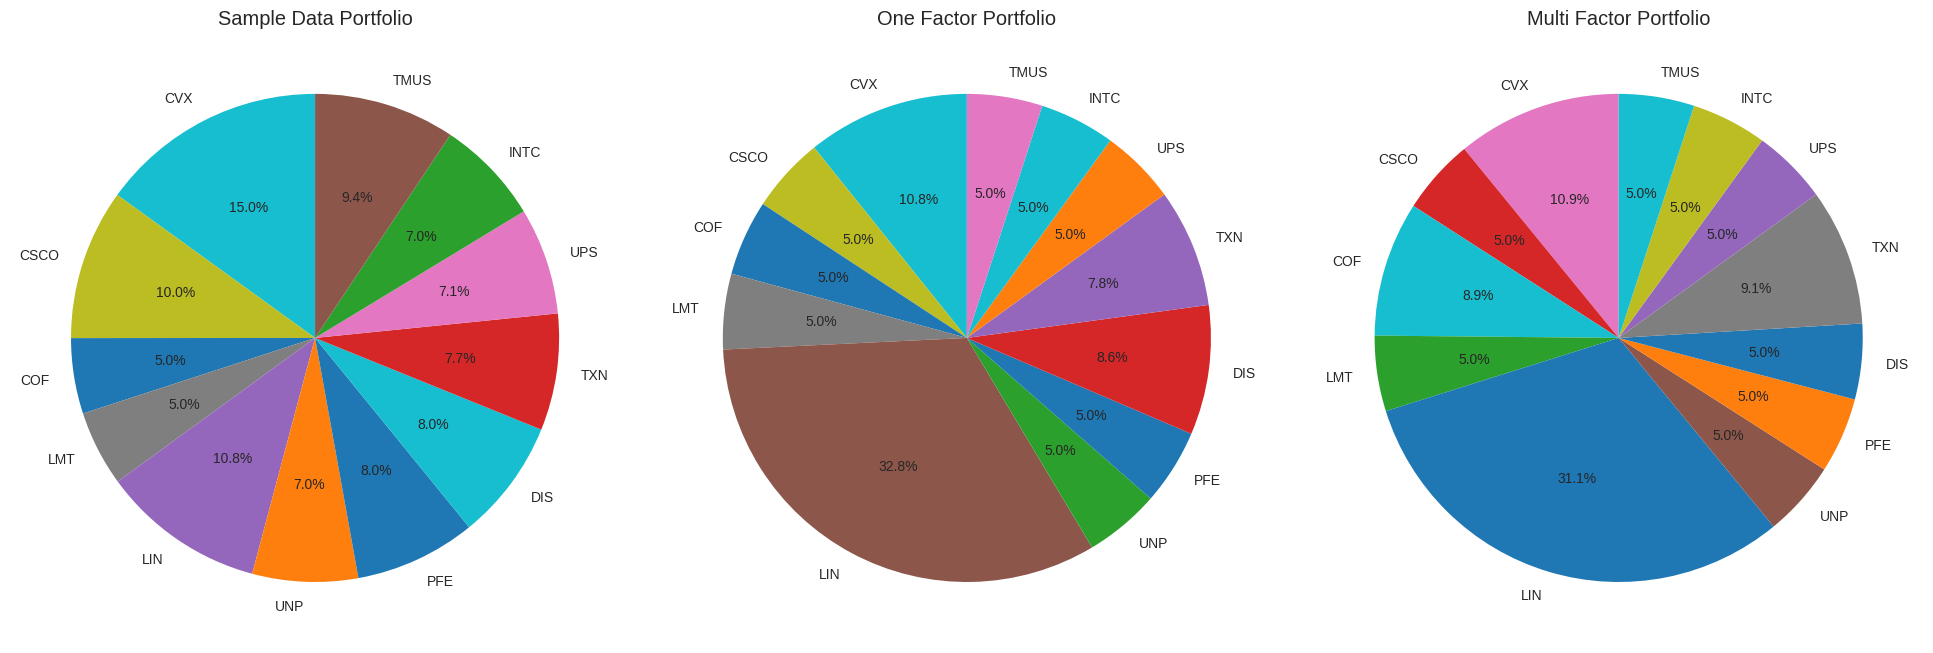

In [133]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# Define data
labels = Weight.index.tolist()[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from labels
sample_data_weights = optimized_weights_sample_data  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
one_factor_weights = optimized_weights_one_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
multi_factor_weights = optimized_weights_multi_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights

# Create a custom color palette
num_colors = len(labels)
np.random.seed(42)  # For reproducibility
colors = plt.cm.get_cmap('tab10', num_colors)  # Using 'tab20c' which has 20 different colors

# Generate colors
sample_data_colors = [colors(i) for i in np.random.permutation(num_colors)]
one_factor_colors = [colors(i) for i in np.random.permutation(num_colors)]
multi_factor_colors = [colors(i) for i in np.random.permutation(num_colors)]

# Create pie chart
fig, ax = plt.subplots(1, 3, figsize=(20, 10))  # Increased figure size

# Sample Data portfolio
ax[0].pie(sample_data_weights, labels=labels, autopct='%1.1f%%', startangle=90, colors=sample_data_colors)
ax[0].set_title('Sample Data Portfolio')

# One Factor portfolio
ax[1].pie(one_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90, colors=one_factor_colors)
ax[1].set_title('One Factor Portfolio')

# Multi Factor portfolio
ax[2].pie(multi_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90, colors=multi_factor_colors)
ax[2].set_title('Multi Factor Portfolio')

plt.tight_layout(pad=3.0)  # Increased spacing between subplots
plt.show()